In [1]:
from select import select
from odps import ODPS
from odps import options
from odps.df import DataFrame
import pandas as pd
import numpy as np
import csv

ACCESS_ID = 'LTAI5t9uwJrh5eJ7Q5E37D1s'
SECRET_ACCESS_KEY = 'NCFHOAnvqfnTrpypgR4b3cNawP8fnB'
ODPS_PROJECT = 'OpenDigger_prod_dev'
ODPS_ENDPOINT = 'http://service.cn-shanghai.maxcompute.aliyun.com/api'

o = ODPS(ACCESS_ID, SECRET_ACCESS_KEY,
         project=ODPS_PROJECT, endpoint=ODPS_ENDPOINT)
options.tunnel.limit_instance_tunnel = False
# options.read_timeout = 3600000

result = o.execute_sql('SELECT * FROM SYZ_CQK_TmpResult2',hints={'odps.sql.allow.fullscan': 'true'})

len = 0
f = open('result.txt','w')

            
with open("line.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    #先写入columns_name
    writer.writerow(["u","v","w"])
    with result.open_reader() as reader:
        for record in reader:
            str_ = str(record.repo_id1)+','+ str(record.repo_id2)+','+ str(record.weight)+'\n'
            writer.writerow([record.repo_id1,record.repo_id2,record.weight])
            len+=1
            if len == 1000000:
                break
    

# #读取SQL执行结果。
# with result.open_reader() as reader:
# github_log = DataFrame(o.get_table('ods_github_log'))
# print(github_log.dtypes)

In [32]:
#df = pd.DataFrame([[1, 2, 4], [2, 3, 2], [1, 3, 6],[1, 4, 4],[2, 4, 1],[3, 5, 2],[1, 5, 8]], columns=['u', 'v', 'w'])
#df

,u,v,w
0,1,2,4
1,2,3,2
2,1,3,6
3,1,4,4
4,2,4,1
5,3,5,2
6,1,5,8


In [2]:
import pandas as pd

csv_file = "line.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)#防止弹出警告
df = pd.DataFrame(csv_data)

In [3]:
df.shape[0]

1000000

In [5]:
#!-*- coding:utf8-*-
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()
for i in range (0,df.shape[0]):
    G.add_edge(df.iloc[i, 0],df.iloc[i, 1],weight=df.iloc[i, 2])
    G.add_edge(df.iloc[i, 1],df.iloc[i, 0],weight=df.iloc[i, 2])
#pos=nx.spring_layout(G,iterations=20)
pr=nx.pagerank(G, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None)
x = 0
with open("point.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["node","value"])
    for node, value in pr.items():
        writer.writerow([node,value])
        x = x + value
    print(x)

0.9999999999999996


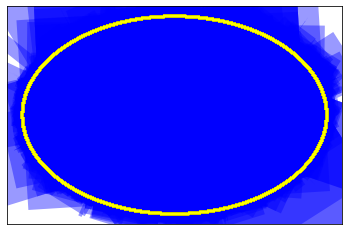

In [6]:
# 丑陋的网络
nx.draw_networkx(G,pos=nx.circular_layout(G),with_labels=False,alpha=0.4,node_color='yellow',node_shape='s',
                 linewidths=0.1,node_size = 2,
                 width=[float(d['weight']) * 0.3 for (u,v,d) in G.edges(data=True)],edge_color='blue',
                 font_size=0.1,font_color='blue',font_family='SimHei')

In [7]:
# 画pagerank网络图
def show_graph(graph, layout='spring_layout'):
    if layout == 'circular_layout':
        positions=nx.circular_layout(graph)
    else:
        positions=nx.spring_layout(graph)
    # 设置网络图中的节点大小，大小与 pagerank 值相关，因为 pagerank 值很小所以需要 *20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4,edge_color = 'r')
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize,edge_color='b',alpha=0.2)
    # 绘制节点的 label
    #nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出关系图
    plt.show()
# 将 pagerank 数值作为节点的属性
nx.set_node_attributes(G, name = 'pagerank', values=pr)
# 画网络图
show_graph(G)

MemoryError: Unable to allocate 1.07 TiB for an array with shape (383343, 383343) and data type float64

In [ ]:
fig.savefig('./666.jpg')

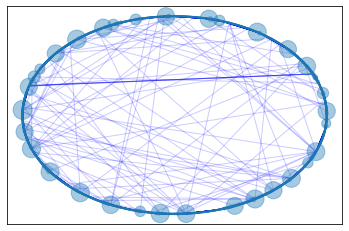

In [6]:
# 将完整的图谱进行精简
# 设置 PR 值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.00005
# 复制一份计算好的网络图
small_graph = G.copy()
# 剪掉 PR 值小于 pagerank_threshold 的节点
for n, p_rank in G.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图,采用circular_layout布局让筛选出来的点组成一个圆
show_graph(small_graph, 'circular_layout')